#Check device status

In [ ]:
#Step 1: Import Libraries
import torch
import pandas as pd
import psutil

#Step 2: GPU Information
def get_gpu_info():
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        total_memory = round(torch.cuda.get_device_properties(0).total_memory / (1024**3), 2)  # Convert bytes to GB
        return {
            "Device": "GPU",
            "Name": gpu_name,
            "Total Memory (GB)": total_memory,
            "CUDA Available": True
        }
    else:
        return {
            "Device": "GPU",
            "Name": "None",
            "Total Memory (GB)": 0,
            "CUDA Available": False
        }

gpu_info = get_gpu_info()

#Step 3: RAM Information
def get_ram_info():
    memory = psutil.virtual_memory()
    total_memory = round(memory.total / (1024**3), 2)  # Convert bytes to GB
    available_memory = round(memory.available / (1024**3), 2)  # Convert bytes to GB
    return {
        "Device": "System RAM",
        "Total Memory (GB)": total_memory,
        "Available Memory (GB)": available_memory
    }

ram_info = get_ram_info()

#Step 4: Combine and Display in a Table Format
# Combine into DataFrame
info_data = {
    "Device": [gpu_info["Device"], ram_info["Device"]],
    "Name": [gpu_info["Name"], "N/A"],
    "Total Memory (GB)": [gpu_info["Total Memory (GB)"], ram_info["Total Memory (GB)"]],
    "Available Memory (GB)": ["N/A", ram_info["Available Memory (GB)"]],
    "CUDA Available": [gpu_info["CUDA Available"], "N/A"]
}

df_info = pd.DataFrame(info_data)

# Display the DataFrame
df_info


,Device,Name,Total Memory (GB),Available Memory (GB),CUDA Available
0,GPU,None,0.00,N/A,False
1,System RAM,N/A,12.67,11.1,N/A


#Download the datas MINIST 784 Data

MNIST Dataset Details:
Number of samples: 70000
Shape of each sample: 784 pixels (flattened 28x28 image)
Number of classes: 10

Data Exploration:
Minimum pixel value: 0
Maximum pixel value: 255
Mean pixel value: 33.39
Standard deviation of pixel values: 78.65

Plotting random samples...


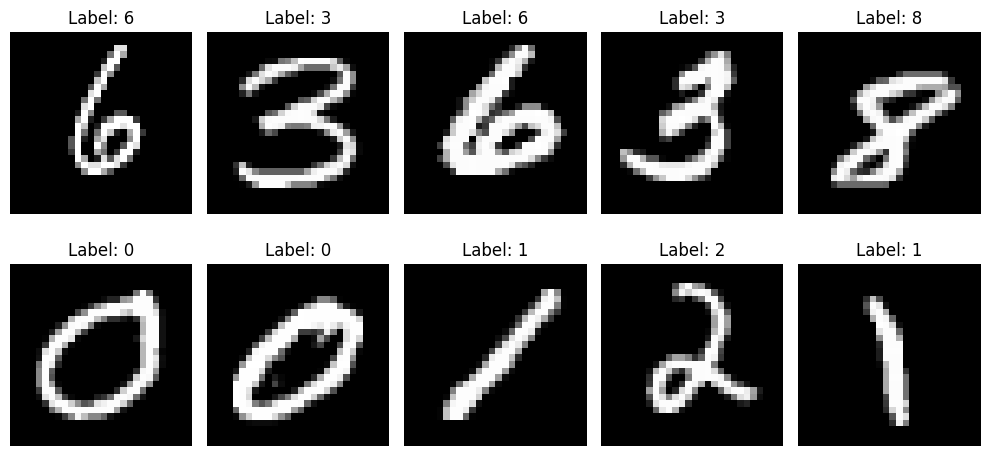

Plotting distribution of classes...


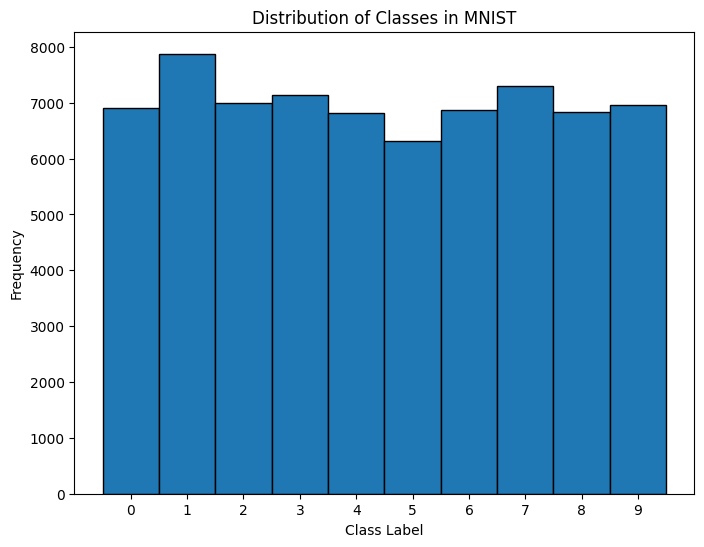

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Download the MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and labels
X, y = mnist.data, mnist.target

# Convert labels to integers
y = y.astype(int)

# Print dataset details
print("MNIST Dataset Details:")
print(f"Number of samples: {X.shape[0]}")
print(f"Shape of each sample: {X.shape[1]} pixels (flattened 28x28 image)")
print(f"Number of classes: {len(np.unique(y))}")

# Display basic statistics about the data
print("\nData Exploration:")
print(f"Minimum pixel value: {X.min()}")
print(f"Maximum pixel value: {X.max()}")
print(f"Mean pixel value: {X.mean():.2f}")
print(f"Standard deviation of pixel values: {X.std():.2f}")

# Plot random samples from the dataset
print("\nPlotting random samples...")
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, X.shape[0])
    axes[i].imshow(X[idx].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {y[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Plot distribution of classes
print("Plotting distribution of classes...")
plt.figure(figsize=(8, 6))
plt.hist(y, bins=np.arange(11)-0.5, edgecolor='black', align='mid')
plt.xticks(range(10))
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in MNIST')
plt.show()


In [ ]:
import os
import numpy as np
from sklearn.datasets import fetch_openml
from PIL import Image

# Download the MNIST dataset
print("Downloading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Extract data and labels
X, y = mnist.data, mnist.target

# Convert labels to integers
y = y.astype(int)

# Normalize pixel values to range [0, 255] and convert to uint8
X = (X / X.max() * 255).astype(np.uint8)

# Define the base directory to save images
base_dir = "mnist_images"
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Save each image as a PNG file in a folder corresponding to its class
print(f"Saving images to {base_dir}...")
for label in np.unique(y):
    # Create a directory for the current class if it doesn't exist
    class_dir = os.path.join(base_dir, str(label))
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Get all indices of the current class
    indices = np.where(y == label)[0]

    # Save images to the class directory
    for idx in indices:
        img = X[idx].reshape(28, 28)  # Reshape the flattened image back to 28x28
        img_path = os.path.join(class_dir, f"{idx}.png")
        Image.fromarray(img).convert('L').save(img_path)

print("All images saved successfully!")

# Example: List saved directories
print("\nDirectory structure:")
for label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, label)
    print(f"Class {label}: {len(os.listdir(class_dir))} images")

Saving images to mnist_images...
All images saved successfully!

Directory structure:
Class 2: 6990 images
Class 5: 6313 images
Class 9: 6958 images
Class 6: 6876 images
Class 8: 6825 images
Class 4: 6824 images
Class 1: 7877 images
Class 0: 6903 images
Class 7: 7293 images
Class 3: 7141 images


#checking the downloaded images direatory

In [ ]:
import os

# Define the base directory where images are saved
base_dir = "mnist_images"

# Dictionary to store the count of images per class
class_counts = {}

# Iterate through each class directory
for class_label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_label)

    # Check if it's a directory
    if os.path.isdir(class_dir):
        # Count the number of images in the class directory
        image_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
        class_counts[class_label] = image_count

# Print the counts
print("Image Counts per Class:")
for class_label, count in sorted(class_counts.items()):
    print(f"Class {class_label}: {count} images")

# Total number of images
total_images = sum(class_counts.values())
print(f"\nTotal number of images: {total_images}")


Image Counts per Class:
Class 0: 6903 images
Class 1: 7877 images
Class 2: 6990 images
Class 3: 7141 images
Class 4: 6824 images
Class 5: 6313 images
Class 6: 6876 images
Class 7: 7293 images
Class 8: 6825 images
Class 9: 6958 images

Total number of images: 70000


#Data Balancing

In [ ]:
import os
import random
import shutil
from PIL import Image

# Define the base directory where images are saved
base_dir = "mnist_images"

# Dictionary to store the count of images per class
class_counts = {}

# Get the counts of images in each class directory
for class_label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_label)
    if os.path.isdir(class_dir):
        image_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
        class_counts[class_label] = image_count

# Find the maximum count of images
max_count = max(class_counts.values())
min_class = min(class_counts, key=class_counts.get)
print(f"Maximum number of images in a class: {max_count}")
print(f"Class with the lowest count: {min_class} ({class_counts[min_class]} images)")

# Balance the dataset
for class_label, count in class_counts.items():
    class_dir = os.path.join(base_dir, class_label)

    # If the class has fewer images, randomly duplicate images
    if count < max_count:
        print(f"Balancing class {class_label}...")

        # List all image files in the directory
        images = [file for file in os.listdir(class_dir) if file.endswith('.png')]

        # Randomly duplicate images until the count matches the maximum
        while count < max_count:
            # Select a random image
            random_image = random.choice(images)
            source_path = os.path.join(class_dir, random_image)

            # Create a new filename for the duplicate
            new_image_name = f"{random_image.split('.')[0]}_dup_{count}.png"
            target_path = os.path.join(class_dir, new_image_name)

            # Copy the image
            shutil.copy(source_path, target_path)

            # Update the count and image list
            count += 1
            images.append(new_image_name)

# Verify the balancing
print("\nUpdated Image Counts per Class:")
for class_label in sorted(class_counts.keys()):
    class_dir = os.path.join(base_dir, class_label)
    updated_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
    print(f"Class {class_label}: {updated_count} images")


Maximum number of images in a class: 7877
Class with the lowest count: 5 (6313 images)
Balancing class 2...
Balancing class 5...
Balancing class 9...
Balancing class 6...
Balancing class 8...
Balancing class 4...
Balancing class 0...
Balancing class 7...
Balancing class 3...

Updated Image Counts per Class:
Class 0: 7877 images
Class 1: 7877 images
Class 2: 7877 images
Class 3: 7877 images
Class 4: 7877 images
Class 5: 7877 images
Class 6: 7877 images
Class 7: 7877 images
Class 8: 7877 images
Class 9: 7877 images


#Checking the balanced data or not

In [ ]:
import os

# Define the base directory where images are saved
base_dir = "mnist_images"

# Dictionary to store the count of images per class
class_counts = {}

# Iterate through each class directory
for class_label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_label)

    # Check if it's a directory
    if os.path.isdir(class_dir):
        # Count the number of images in the class directory
        image_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
        class_counts[class_label] = image_count

# Print the counts
print("Image Counts per Class:")
for class_label, count in sorted(class_counts.items()):
    print(f"Class {class_label}: {count} images")

# Total number of images
total_images = sum(class_counts.values())
print(f"\nTotal number of images: {total_images}")


Image Counts per Class:
Class 0: 7877 images
Class 1: 7877 images
Class 2: 7877 images
Class 3: 7877 images
Class 4: 7877 images
Class 5: 7877 images
Class 6: 7877 images
Class 7: 7877 images
Class 8: 7877 images
Class 9: 7877 images

Total number of images: 78770


#Pip install direatories

In [ ]:
!pip install torch torchvision scikit-learn matplotlib

#CNN pipeline architecture test with data loading threshiold

Input shape: torch.Size([1, 28, 28])

Starting Training...


Epoch 1/10: 100%|██████████| 16/16 [00:00<00:00, 20.72batch/s, Loss=0.0000]


Epoch 1/10 Completed, Average Loss: 0.1505


Epoch 2/10: 100%|██████████| 16/16 [00:00<00:00, 18.84batch/s, Loss=0.0000]


Epoch 2/10 Completed, Average Loss: 0.0000


Epoch 3/10: 100%|██████████| 16/16 [00:01<00:00, 14.12batch/s, Loss=0.0000]


Epoch 3/10 Completed, Average Loss: 0.0000


Epoch 4/10: 100%|██████████| 16/16 [00:01<00:00, 15.20batch/s, Loss=0.0000]


Epoch 4/10 Completed, Average Loss: 0.0000


Epoch 5/10: 100%|██████████| 16/16 [00:01<00:00, 14.96batch/s, Loss=0.0000]


Epoch 5/10 Completed, Average Loss: 0.0000


Epoch 6/10: 100%|██████████| 16/16 [00:01<00:00, 13.99batch/s, Loss=0.0000]


Epoch 6/10 Completed, Average Loss: 0.0000


Epoch 7/10: 100%|██████████| 16/16 [00:01<00:00, 13.50batch/s, Loss=0.0000]


Epoch 7/10 Completed, Average Loss: 0.0000


Epoch 8/10: 100%|██████████| 16/16 [00:01<00:00, 13.98batch/s, Loss=0.0000]


Epoch 8/10 Completed, Average Loss: 0.0000


Epoch 9/10: 100%|██████████| 16/16 [00:00<00:00, 16.49batch/s, Loss=0.0000]


Epoch 9/10 Completed, Average Loss: 0.0000


Epoch 10/10: 100%|██████████| 16/16 [00:01<00:00, 12.31batch/s, Loss=0.0000]


Epoch 10/10 Completed, Average Loss: 0.0000
Model saved to cnn_mnist_model.pth

Evaluating Model...


Evaluation: 100%|██████████| 16/16 [00:01<00:00,  9.15batch/s]



Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1000

    accuracy                         1.0000      1000
   macro avg     1.0000    1.0000    1.0000      1000
weighted avg     1.0000    1.0000    1.0000      1000



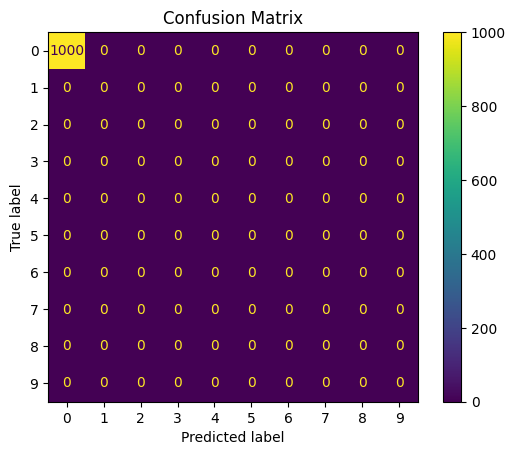

Final Accuracy: 1.0000
Final Input Shape: torch.Size([1, 28, 28])


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define directories
base_dir = "mnist_images"

# Define data transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Ensure grayscale images
    transforms.ToTensor(),   # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Data Loading Threshold
max_samples = 1000  # Set threshold for maximum number of samples

# Load datasets
train_dataset = datasets.ImageFolder(root=base_dir, transform=transform)
if len(train_dataset) > max_samples:
    train_dataset.samples = train_dataset.samples[:max_samples]  # Reduce dataset size if threshold is exceeded

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Determine input shape
input_shape = train_dataset[0][0].shape
print(f"Input shape: {input_shape}")

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten dynamically based on batch size
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model with progress bar
num_epochs = 10
model.train()
print("\nStarting Training...")
for epoch in range(num_epochs):
    total_loss = 0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            pbar.set_postfix({"Loss": f"{loss.item():.4f}"})
            pbar.update(1)
    print(f"Epoch {epoch+1}/{num_epochs} Completed, Average Loss: {total_loss/len(train_loader):.4f}")

# Save the trained model
model_path = "cnn_mnist_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Evaluate the model with progress bar
model.eval()
all_labels = []
all_preds = []
print("\nEvaluating Model...")
with tqdm(total=len(train_loader), desc="Evaluation", unit="batch") as pbar:
    with torch.no_grad():
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            pbar.update(1)

# Calculate metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, digits=4))

# Confusion Matrix
all_class_labels = range(len(train_dataset.classes))  # Ensure all class indices are used
cm = confusion_matrix(all_labels, all_preds, labels=all_class_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Final results
accuracy = sum(cm.diagonal()) / cm.sum()
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final Input Shape: {input_shape}")

#CNN fully Learning

Class-to-Label Mapping: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Input shape: torch.Size([1, 28, 28])

Starting Training...


Epoch 1/10: 100%|██████████| 1094/1094 [00:53<00:00, 20.37batch/s, Loss=0.1706]


Epoch 1/10 Completed, Average Loss: 0.1462


Epoch 2/10: 100%|██████████| 1094/1094 [00:42<00:00, 25.77batch/s, Loss=0.0289]


Epoch 2/10 Completed, Average Loss: 0.0505


Epoch 3/10: 100%|██████████| 1094/1094 [00:40<00:00, 26.78batch/s, Loss=0.0503]


Epoch 3/10 Completed, Average Loss: 0.0356


Epoch 4/10: 100%|██████████| 1094/1094 [00:39<00:00, 27.55batch/s, Loss=0.1424]


Epoch 4/10 Completed, Average Loss: 0.0269


Epoch 5/10: 100%|██████████| 1094/1094 [00:40<00:00, 26.98batch/s, Loss=0.0056]


Epoch 5/10 Completed, Average Loss: 0.0207


Epoch 6/10: 100%|██████████| 1094/1094 [00:40<00:00, 27.12batch/s, Loss=0.0018]


Epoch 6/10 Completed, Average Loss: 0.0164


Epoch 7/10: 100%|██████████| 1094/1094 [00:41<00:00, 26.18batch/s, Loss=0.0117]


Epoch 7/10 Completed, Average Loss: 0.0148


Epoch 8/10: 100%|██████████| 1094/1094 [00:40<00:00, 27.07batch/s, Loss=0.0285]


Epoch 8/10 Completed, Average Loss: 0.0129


Epoch 9/10: 100%|██████████| 1094/1094 [00:39<00:00, 27.49batch/s, Loss=0.0003]


Epoch 9/10 Completed, Average Loss: 0.0106


Epoch 10/10: 100%|██████████| 1094/1094 [00:39<00:00, 27.51batch/s, Loss=0.0021]


Epoch 10/10 Completed, Average Loss: 0.0096
Model weights saved to cnn_model_weights.pth
Entire model saved to cnn_model_full.pth

Evaluating Model...


Evaluation: 100%|██████████| 1094/1094 [00:32<00:00, 33.71batch/s]



Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998      6903
           1     0.9990    0.9999    0.9994      7877
           2     0.9994    0.9997    0.9996      6990
           3     0.9969    0.9997    0.9983      7141
           4     0.9993    0.9991    0.9992      6824
           5     0.9979    0.9994    0.9987      6313
           6     1.0000    0.9978    0.9989      6876
           7     0.9988    0.9988    0.9988      7293
           8     0.9993    0.9978    0.9985      6825
           9     0.9994    0.9976    0.9985      6958

    accuracy                         0.9990     70000
   macro avg     0.9990    0.9990    0.9990     70000
weighted avg     0.9990    0.9990    0.9990     70000



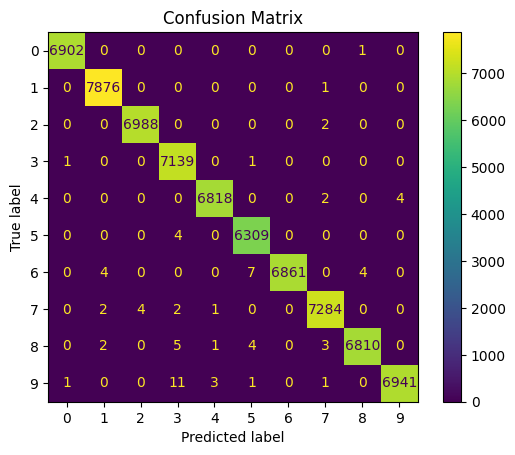

Final Accuracy: 0.9990
Final Input Shape: torch.Size([1, 28, 28])
Model weights loaded successfully!
Entire model loaded successfully!


<ipython-input-28-d882d4a37916>:121: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_for_inference.load_state_dict(torch.load(weights_path))
<ipython-input-28-d882d4a379

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
import matplotlib.pyplot as plt

# Define directories
base_dir = "mnist_images"  # Ensure this directory has subfolders named '0', '1', ..., '9'

# Define data transformations
transform = transforms.Compose([
    transforms.Grayscale(),  # Ensure grayscale images
    transforms.ToTensor(),   # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values
])

# Load dataset and verify correct labeling
train_dataset = datasets.ImageFolder(root=base_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Verify class-to-label mapping
print(f"Class-to-Label Mapping: {train_dataset.class_to_idx}")

# Determine input shape
input_shape = train_dataset[0][0].shape
print(f"Input shape: {input_shape}")

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten dynamically based on batch size
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model with progress bar
num_epochs = 10
model.train()
print("\nStarting Training...")
for epoch in range(num_epochs):
    total_loss = 0
    with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            pbar.set_postfix({"Loss": f"{loss.item():.4f}"})
            pbar.update(1)
    print(f"Epoch {epoch+1}/{num_epochs} Completed, Average Loss: {total_loss/len(train_loader):.4f}")

# Save the model weights
weights_path = "cnn_model_weights.pth"
torch.save(model.state_dict(), weights_path)
print(f"Model weights saved to {weights_path}")

# Save the entire model
model_path = "cnn_model_full.pth"
torch.save(model, model_path)
print(f"Entire model saved to {model_path}")

# Evaluate the model with progress bar
model.eval()
all_labels = []
all_preds = []
print("\nEvaluating Model...")
with tqdm(total=len(train_loader), desc="Evaluation", unit="batch") as pbar:
    with torch.no_grad():
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            pbar.update(1)

# Calculate metrics
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, digits=4))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap="viridis", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Final results
accuracy = sum(cm.diagonal()) / cm.sum()
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final Input Shape: {input_shape}")

# Load the model weights for inference
model_for_inference = CNN().to(device)
model_for_inference.load_state_dict(torch.load(weights_path))
print("Model weights loaded successfully!")

# Load the entire model for inference
loaded_model = torch.load(model_path)
loaded_model = loaded_model.to(device)
print("Entire model loaded successfully!")


#Data balancing

In [ ]:
import os
import random
import shutil
from PIL import Image

# Define the base directory where images are saved
base_dir = "mnist_images"

# Dictionary to store the count of images per class
class_counts = {}

# Get the counts of images in each class directory
for class_label in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_label)
    if os.path.isdir(class_dir):
        image_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
        class_counts[class_label] = image_count

# Find the maximum count of images
max_count = max(class_counts.values())
min_class = min(class_counts, key=class_counts.get)
print(f"Maximum number of images in a class: {max_count}")
print(f"Class with the lowest count: {min_class} ({class_counts[min_class]} images)")

# Balance the dataset
for class_label, count in class_counts.items():
    class_dir = os.path.join(base_dir, class_label)

    # If the class has fewer images, randomly duplicate images
    if count < max_count:
        print(f"Balancing class {class_label}...")

        # List all image files in the directory
        images = [file for file in os.listdir(class_dir) if file.endswith('.png')]

        # Randomly duplicate images until the count matches the maximum
        while count < max_count:
            # Select a random image
            random_image = random.choice(images)
            source_path = os.path.join(class_dir, random_image)

            # Create a new filename for the duplicate
            new_image_name = f"{random_image.split('.')[0]}_dup_{count}.png"
            target_path = os.path.join(class_dir, new_image_name)

            # Copy the image
            shutil.copy(source_path, target_path)

            # Update the count and image list
            count += 1
            images.append(new_image_name)

# Verify the balancing
print("\nUpdated Image Counts per Class:")
for class_label in sorted(class_counts.keys()):
    class_dir = os.path.join(base_dir, class_label)
    updated_count = len([file for file in os.listdir(class_dir) if file.endswith('.png')])
    print(f"Class {class_label}: {updated_count} images")


Maximum number of images in a class: 7877
Class with the lowest count: 5 (6313 images)
Balancing class 0...
Balancing class 6...
Balancing class 3...
Balancing class 5...
Balancing class 8...
Balancing class 4...
Balancing class 9...
Balancing class 7...
Balancing class 2...

Updated Image Counts per Class:
Class 0: 7877 images
Class 1: 7877 images
Class 2: 7877 images
Class 3: 7877 images
Class 4: 7877 images
Class 5: 7877 images
Class 6: 7877 images
Class 7: 7877 images
Class 8: 7877 images
Class 9: 7877 images
